In [2]:
%matplotlib inline
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm, laplace


# The Gaussian (Normal) Distribution
The bell curve! It has two parameters, mean and variance, which completely parametrize it.

$$
N(x|\mu,\sigma) = \frac 1 {\sqrt{2 \pi \sigma^2}} exp^{\frac {-{(x-\mu)}^2} {2\sigma^2}}
$$

Further notation: $X \sim N(\mu, \sigma)$ indicates $p(X=x) = N(x|\mu,\sigma)$

The <strong>precision</strong> of a Gaussian distribution $\lambda = \frac 1 {\sigma^2}$is the inverse of its variance, and therefore measures how tight its variance is around its mean.

Its cumulative density function (CDF) is defined as follows:

$$
\Phi(x;\mu,\sigma) = \int_{-\infty}^x N(x|\mu,\sigma^2)dx
$$

Core reasons Gaussian distributions are widely used in statistics and machine learning:
- It is completely described by two intuitive parameters
- By the Central Limit Theorem, sums of independent random variables are approximately Gaussian, making Gaussians natural choices for modeling uncertainty (noise).
- It has maximum entropy (because it makes the least amount of assumptions) subject to having a specified mean and variance, which makes it a good "default choice."
- Its computation is closed-form and straight-forward.

# The Student t Distribution
One issue with the Gaussian distribution is that it is sensitive to outliers: the log-probability only decays quadratically with distance from the mean. This means that fitting data to a Gaussian can be brittle, as the probability mass given to an outlier skews the fitting process's perception of what the true mean and variance is. <br/>
A more robust distribution in this sense is the Student distribution:

$$
\tau(x|\mu,\sigma^2,\upsilon) \propto [{1 + \frac 1 \upsilon ({\frac {x-\mu} \sigma}^2)}]^{-(\frac {\upsilon + 1} 2)} \\
\begin{align}
    mean &:\ \mu \\
    variance &: \sigma^2 (\frac \upsilon {\upsilon - 2})
\end{align}
$$

Here, $\sigma$ is a scale parameter and $\upsilon$ > 0 is the number of degrees of freedom.

# The Laplace Distribution
Another robust, long-tailed distribution is the Laplace distribution, which is also known as the double-sided exponential distribution. This name is apparent through the definition:

$$
Lap(x | \mu, b) = \frac 1 {2b} exp^({-\frac {|x - \mu|} b}) \\
\begin{align}
    mean &: \mu \\
    mode &: \mu \\
    var  &: 2b^2
\end{align}
$$

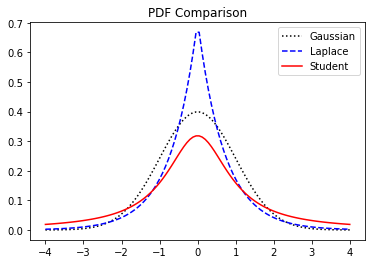

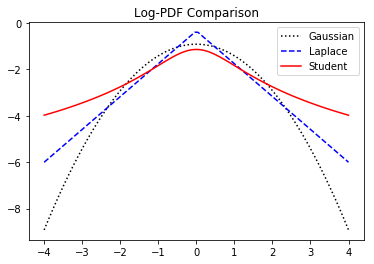

In [8]:
\begin{align}
    mean &: \mu \\
    mode &: \mu \\
    var  &: 2b^2
\end{align}

x = np.linspace(-4, 4, 100)
d_norm = norm.pdf(x, loc=0, scale=1)
d_lapl = laplace.pdf(x, loc=0, scale=1./np.sqrt(2))
d_t = t.pdf(x, df=1, loc=0, scale=1)

plt.plot(x, d_norm, 'k:')
plt.plot(x, d_lapl, 'b--')
plt.plot(x, d_t, 'r-')
plt.legend(("Gaussian", "Laplace", "Student"))
plt.title("PDF Comparison")

plt.figure()
plt.plot(x, np.log(d_norm), 'k:')
plt.plot(x, np.log(d_lapl), 'b--')
plt.plot(x, np.log(d_t), 'r-')
plt.legend(("Gaussian", "Laplace", "Student"))
plt.title("Log-PDF Comparison")
